In [1]:
with open('output_automate.txt', 'r') as f:
    out = f.read()

In [8]:
ps = out.split('\n\n\n')

In [7]:
len(ps)

19

In [2]:
with open('lenet_out.txt', 'r') as f:
    out_1 = f.read()
    
print(out_1)

LENET SKETCHES 
lenet
[0.708171010017395, 48.32275488972664, 26.589749328792095, 16.954845555126667, 11.197384361177683, 9.368387131020427, 6.062283542007208, 6.516246340703219, 3.7274515186436474, 4.839164508273825, 2.6457846011035144, 1.8144996098708361, 4.329902379075065, 1.7394268886419013, 1.132706802804023, 0.7744206857169047, 0.6175081409455743, 1.0249482014332898, 0.4555272921861615, 0.6146355142409448, 0.4322599300794536, 0.4355229161810712, 0.28654973779339343, 0.6136021823476767, 0.4973688880709233, 0.17275091778719798, 0.24608669842564268, 0.39039420742483344, 1.858412025598227, 0.8274519014667021, 0.26591802373877726, 2.679866623271664, 0.9906787081999937, 0.21414778448524885, 0.17638665314007085, 0.1286836348081124, 0.13804503703431692, 0.0701865036826348, 0.16419089386909036, 0.07707826314072008, 0.10702833762843511, 0.0803546939350781, 0.07669386461748218, 0.051107408729876624, 0.05303996898510377, 1.000622660127192, 0.2679867692186235, 0.9406915728213789, 1.73264201704

In [3]:
val_loss = []
val_acc = []
for j in out_1.split('\n\n\n')[:-1]:
    for i in j.split('\n\n'):
        val_loss.append(eval(i.split('\n')[-3]))
        val_acc.append(eval(i.split('\n')[-2]))
        break

In [86]:
len(val_loss)

6

In [10]:

for j in out_1.split('\n\n\n')[:-1]:
    print(j.split('\n')[0]) if j.split('\n')[0] else print(j.split('\n')[1])
    acc = []
    iterr = []
    for i in j.split('\n\n'):
        a = i.split('\n')[-1].split(' ')
        acc.append(eval(a[0]))
        iterr.append(eval(a[1])*100)
    lenetM.append(round(np.mean(acc), 2))
    lenetS.append(round(np.std(acc), 2))
    lenetMI.append(round(np.mean(iterr), 2))
    lenetSI.append(round(np.std(iterr), 2))
    
lenetM, lenetS

LENET SKETCHES 
LENET MAPS 
LENET ICONS 
LENET GRAPHS 
LENET FLAGS 
LENET BLACK 


([75.3, 89.85, 81.8, 84.2, 82.5, 89.5], [3.93, 1.39, 2.83, 2.25, 2.39, 0.55])

In [11]:
lenetM = lenetM[:-1]
lenetM = lenetM[1:] + lenetM[:1]
lenetM

[89.85, 81.8, 84.2, 82.5, 75.3]

In [12]:
lenetS = lenetS[:-1]
lenetS = lenetS[1:] + lenetS[:1]
lenetS

[1.39, 2.83, 2.25, 2.39, 3.93]

In [9]:
import numpy as np 

lenetM, lenetS = [], []
vggM, vggS = [], []
resnetM, resnetS = [], []

lenetMI, lenetSI = [], []
vggMI, vggSI = [], []
resnetMI, resnetSI = [], []

for idx, model in enumerate(ps[:-1]):
    print(model.split('\n')[0]) if model.split('\n')[0] else print(model.split('\n')[1])
    namie = model.split('\n')[0] if model.split('\n')[0] else model.split('\n')[1]
    if 'BLACK' in namie: 
        continue
    iters = []
    accs = []
    for line in model.split('\n\n'):
        l = line.split('\n')[-1]
        a = l.split()
        accs.append(eval(a[0]))
        iters.append(eval(a[1]))
    m = np.mean(accs)
    s = round(np.std(accs), 2)       
    mI = np.mean(iters)
    sI = round(np.std(iters), 2)
    if (idx + 1) % 3 == 0:
        continue
#         lenetM.append(m)
#         lenetS.append(s)
#         lenetMI.append(mI*100)
#         lenetSI.append(sI*100)
    if (idx + 1) % 2 == 0:
        resnetM.append(m)
        resnetS.append(s)
        resnetMI.append(mI*100)
        resnetSI.append(sI*100)
    else:
        vggM.append(m)
        vggS.append(s)
        vggMI.append(mI*100)
        vggSI.append(sI*100)
                          
    print(str(np.mean(accs)) + ' \pm ' + str(round(np.std(accs), 2)) + ' & ' + str(np.mean(iters)) + ' \pm ' + str(round(np.std(iters), 2)))
    print('-')

VGG MAPS
98.0 \pm 0.27 & 33.2 \pm 11.23
-
RESNET MAPS 
98.05 \pm 0.29 & 34.2 \pm 11.94
-
LENET MAPS 
VGG ICONS
92.4 \pm 0.2 & 34.0 \pm 9.53
-
RESNET ICONS
91.65 \pm 0.37 & 30.6 \pm 11.96
-
LENET ICONS 
VGG GRAPHS
97.4 \pm 0.37 & 33.0 \pm 6.51
-
RESNET graphs
97.6 \pm 0.37 & 19.4 \pm 7.39
-
LENET GRAPHS 
VGG FLAGS
96.3 \pm 0.6 & 34.2 \pm 11.09
-
RESNET FLAGS
96.5 \pm 0.55 & 34.4 \pm 8.91
-
LENET FLAGS 
VGG BLACK
RESNET BLACK
LENET BLACK 
VGG SKETCHES 
88.3 \pm 0.81 & 22.4 \pm 9.13
-
RESNET SKETCHES 
87.6 \pm 1.02 & 23.6 \pm 5.92
-
LENET SKETCHES


In [38]:
vggM

[98.0, 91.65, 97.4, 96.5, 87.6]

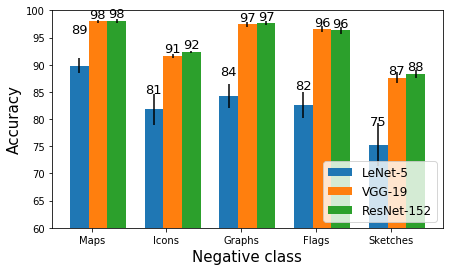

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, lenetM, width, yerr=lenetS)
rects2 = ax.bar(ind+width, vggM, width, yerr=vggS)
rects3 = ax.bar(ind+width*2, resnetM, width, yerr=resnetS)

# add some
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xlabel('Negative class', fontsize=15)
ax.set_xticks(ind + width*2 / 3)
ax.set_xticklabels( ('Maps', 'Icons', 'Graphs', 'Flags', 'Sketches') )
ax.set_ylim(60, 100)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('LeNet-5', 'VGG-19', 'ResNet-152'), loc='lower right', fontsize=12)

# def autolabel(rects, num, lenet=False):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     nummies = [1.06, 1.03, 1.04, 1.03, 1.04, 1.02]
#     for idx, rect in enumerate(rects):
#         if lenet:
#             num = nummies[idx]
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., num*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1, 1.07)
# autolabel(rects2, 1.4)
# autolabel(rects3, 1.3)

def autolabel(rects, num, lenet=False):
    """
    Attach a text label above each bar displaying its height
    """
    nummies = [1.06, 1.03, 1.04, 1.03, 1.04, 1.02]
    for idx, rect in enumerate(rects):
        if lenet:
            num = nummies[idx]
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., num*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=13)

autolabel(rects1, 1, True)
autolabel(rects2, 1.001)
autolabel(rects3, 1.001)

plt.savefig('categories.png', bbox_inches = 'tight')
plt.show()

In [5]:
list(range(100, 4900, 100))

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800]

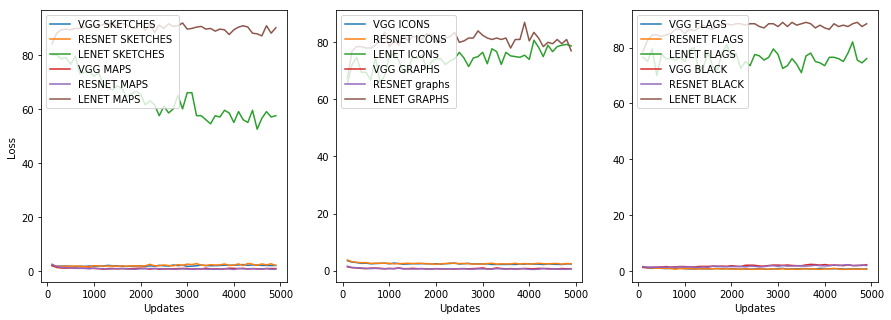

In [89]:
import numpy as np 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
upd = 0

lenetties = 0

for idx, model in enumerate(ps[:-1]):
    #print(model.split('\n')[0]) if model.split('\n')[0] else print(model.split('\n')[1])
    if model.split('\n')[0]:
        name = model.split('\n')[0]
    else:
        name = model.split('\n')[1]
        
    for line in model.split('\n\n'):
        l_acc = line.split('\n')[-2]
        l_loss = line.split('\n')[-3]
        a_a = eval(l_acc)
        a_l = eval(l_loss)
        break
    if 'LENET' in name:
        axes[upd].plot(range(100, 5000, 100), val_loss[lenetties][1:], label=name)
        lenetties += 1
    else:
        axes[upd].plot(range(100, 5000, 100), a_l[1:], label=name)
    if (idx + 1) % 6 == 0 and upd < 2:
        if upd == 0:
            axes[upd].set_ylabel('Loss')
        axes[upd].set_xlabel('Updates')
        axes[upd].legend(loc='upper left')
        upd += 1
        
axes[upd].set_xlabel('Updates')
axes[upd].legend(loc='upper left')
plt.savefig('losses_fine.png')
plt.show()

        

VGG MAPS
RESNET MAPS 
LENET MAPS 
VGG ICONS
RESNET ICONS
LENET ICONS 
VGG GRAPHS
RESNET graphs
LENET GRAPHS 
VGG FLAGS
RESNET FLAGS
LENET FLAGS 
VGG BLACK
RESNET BLACK
LENET BLACK 
VGG SKETCHES 
RESNET SKETCHES 
LENET SKETCHES


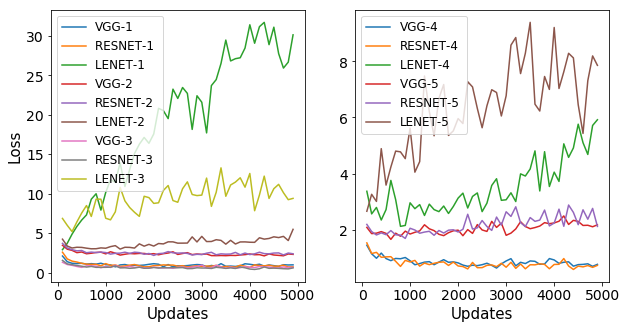

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
upd = 0
lenetties = 0

for idx, model in enumerate(ps[:-1]):
    print(model.split('\n')[0]) if model.split('\n')[0] else print(model.split('\n')[1])
    if model.split('\n')[0]:
        name = model.split('\n')[0]
    else:
        name = model.split('\n')[1]
        
    for line in model.split('\n\n'):
        l_acc = line.split('\n')[-2]
        l_loss = line.split('\n')[-3]
        a_a = eval(l_acc)
        a_l = eval(l_loss)
        break
    name = name.replace(' SKETCHES', '-5')
    name = name.replace(' FLAGS', '-4')
    name = name.replace(' GRAPHS', '-3')
    name = name.replace(' graphs', '-3')
    name = name.replace(' ICONS', '-2')
    name = name.replace(' MAPS', '-1')
    if 'LENET' in name and 'BLACK' not in name:
        axes[upd].plot(range(100, 5000, 100), val_loss[lenetties][1:], label=name)
        lenetties += 1
    elif 'BLACK' in name:
        continue
    else:
        axes[upd].plot(range(100, 5000, 100), a_l[1:], label=name)
    if (idx + 1) % 9 == 0 and upd < 1:
        if upd == 0:
            axes[upd].set_ylabel('Loss', fontsize=15)
        axes[upd].set_xlabel('Updates', fontsize=15)
        axes[upd].legend(loc='upper left', fontsize=12)
        upd += 1
        
axes[upd].set_xlabel('Updates', fontsize=15)
axes[upd].legend(loc='upper left', fontsize=12)
plt.savefig('losses_fine.png', bbox_inches = 'tight')
plt.show()